In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score,confusion_matrix
import seaborn as sns

In [2]:
data=pd.read_csv("C:\\Users\\johnn\\OneDrive\\Desktop\\ML_DATASETS\\REGRESSION\\Logistic_Regression\\Social_Network_Ads.csv")

In [3]:
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [8]:
data=data.drop('User ID',axis=1)

In [9]:
data['Gender']=np.where(data['Gender']=='Male',0,1)
data

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,1,46,41000,1
396,1,51,23000,1
397,1,50,20000,1
398,1,36,33000,0


In [11]:
data.isna().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [14]:
x_age=data[['Age']]
y=data[['Purchased']]

In [16]:
x_age

,Age
0,19
1,35
2,26
3,27
4,19
...,...
395,46
396,51
397,50
398,36


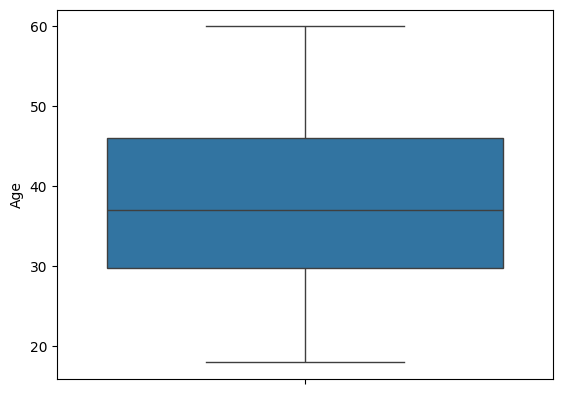

In [17]:
sns.boxplot(y=data['Age'])
plt.show()

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x_age,y,train_size=0.8)

In [21]:
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
r2=r2_score(y_pred,y_test)

c:\Users\printL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [22]:
print("The R2 score is ",r2)

The R2 score is  0.5345454545454545


In [24]:
model.coef_

array([[0.17810876]])

In [25]:
model.intercept_

array([-7.60738771])

c:\Users\printL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


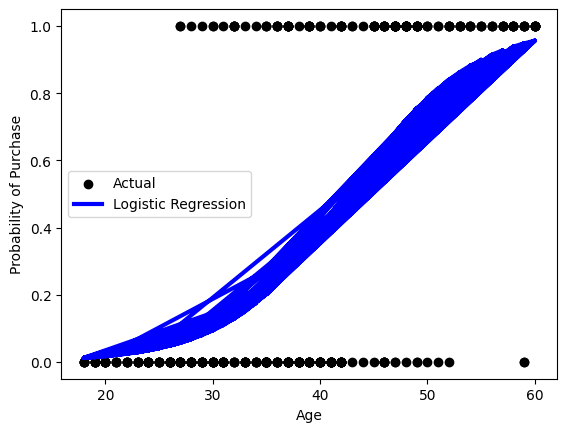

In [27]:
# Plot the data points
plt.scatter(data['Age'], data['Purchased'], color='black', label='Actual')

# Plot the logistic curve
X_range = data['Age'].values.reshape(-1, 1)
y_prob = model.predict_proba(X_range)[:, 1]
plt.plot(data['Age'], y_prob, color='blue', linewidth=3, label='Logistic Regression')

# Set labels and legend
plt.xlabel('Age')
plt.ylabel('Probability of Purchase')
plt.legend()

# Show the plot
plt.show()